# Hospital Data Exploration

<a id="top"></a>
## Contents
* <a href="#Loading">Load Data</a>
* <a href="#Business">Business Understanding</a>
* <a href="#Understanding">Data Understanding</a>
    * <a href="#Claims">Claims</a>
        * <a href="#spec&place">What do the "Specialty" and "Place to serve" tell us?</a>
        * <a href="#day&disease">What do the "LengthOfStay", "CharlsonIndex", "Primary Condition Group" and "Place Serve"  tell us?</a>
        * <a href="#paydelay&disease">What do the "PayDelay" and "Primary Condition Group" tell us?</a>
        * <a href="#dsfs">What do personal "DaySinceFirstService" and "Primary Condition Group"  tell us?</a>
        * <a href="#missing3">How should I deal with the missing data: "ProviderID", "Primary Care Physician" and "Vendor"?</a>
    * <a href="#Members">Members</a>
        * <a href="#gender">What does the "Gender" tell us?</a>
        * <a href="#gender&age">What do the "Gender", "Age" and "Primary Condition Group" tell us?</a>
    * <a href="#Dayin">Day In Hospital</a>
        * <a href="#dy2">What does "DayInHospital" from Y2 tell us?</a>

<a id="Loading"></a>
# Load Data

In [2]:
claims <- read.csv(file="Claims_Y1.csv")
members <- read.csv(file="Members_Y1.csv")
dayin <- read.csv(file="DayInHospital_Y2.csv")

<a id="Business"></a>
<a href="#top">Back to Top</a>
# Business Understanding

<a id="Understanding"></a>
<a href="#top">Back to Top</a>
# Data Understanding


<a id="Claims"></a>
## Claims_Y1.cvs
### Data Scale

Member ID | Provider ID | Vendor | PCP | Year | Specialty | Placesvc | PayDelay | LengthOfStay | DSFS | PrimaryConditionGroup | CharlsonIndex
:---: | :---: | :---: | :---: |:---: | :---: | :---: | :---: |:---: | :---: | :---: | :---: |
Norminal | Norminal | Norminal | Norminal | Norminal | Norminal | Norminal | Ratio | Norminal | Norminal | Norminal | Norminal

### Data Summary

In [2]:
claims$MemberID <- as.factor(claims$MemberID)
claims$ProviderID <- as.factor(claims$ProviderID)
claims$vendor <- as.factor(claims$vendor)
claims$pcp <- as.factor(claims$pcp)
summary(claims)
#1st/3rd Qu.: 1st/3rd Quartile(25%/75%)

      MemberID          ProviderID         vendor            pcp        
 643099505:    37   776433376: 52992   2999365: 52992   842615 : 20292  
 182716400:    36   640687583: 30691   9380038: 51995   153338 : 11216  
 373012540:    36   203264289: 21864   489763 : 33658   517456 : 10126  
 461240127:    36   376108719: 16201   6316517: 31034   967971 :  8582  
 894669103:    36   784064063: 12368   4192922: 30691   626015 :  8293  
 9411145  :    35   (Other)  :506687   (Other):437844   (Other):584578  
 (Other)  :644490   NA's     :  3903   NA's   :  6492   NA's   :  1619  
 Year                     specialty                     placesvc     
 Y1:644706   Internal          :170642   Office             :404309  
             General Practice  :129284   Independent Lab    :125498  
             Laboratory        :124325   Urgent Care        : 49748  
             Diagnostic Imaging: 66641   Outpatient Hospital: 30989  
             Surgery           : 53774   Inpatient Hospital : 2178

<a id="spec&place"></a>
<a href="#top">Back to Top</a>
### What do the "Specialty" and "Place to serve" tell us?

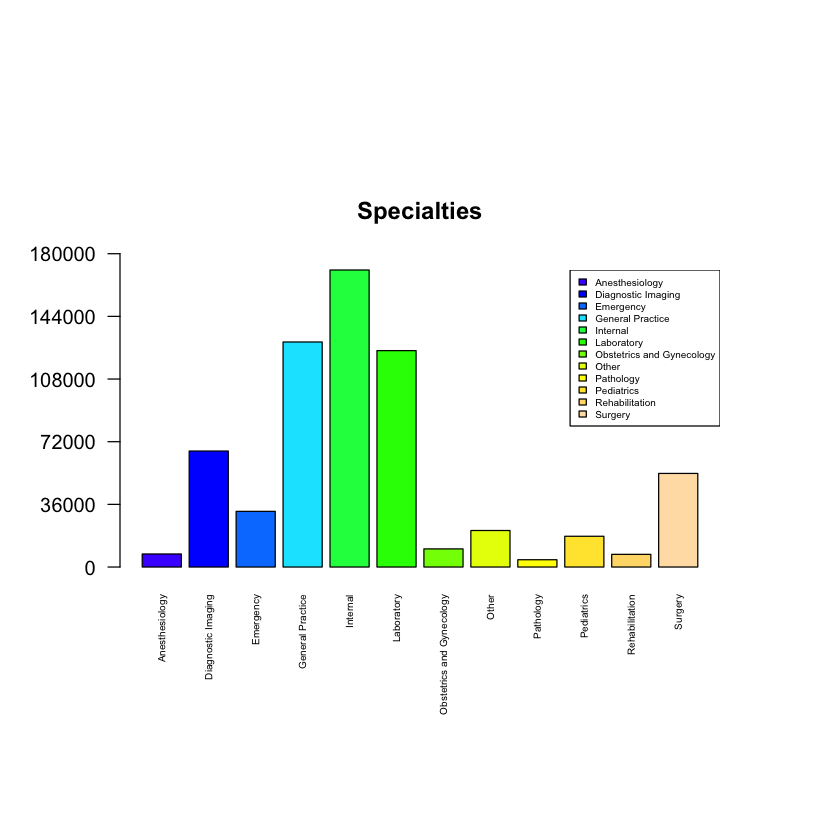

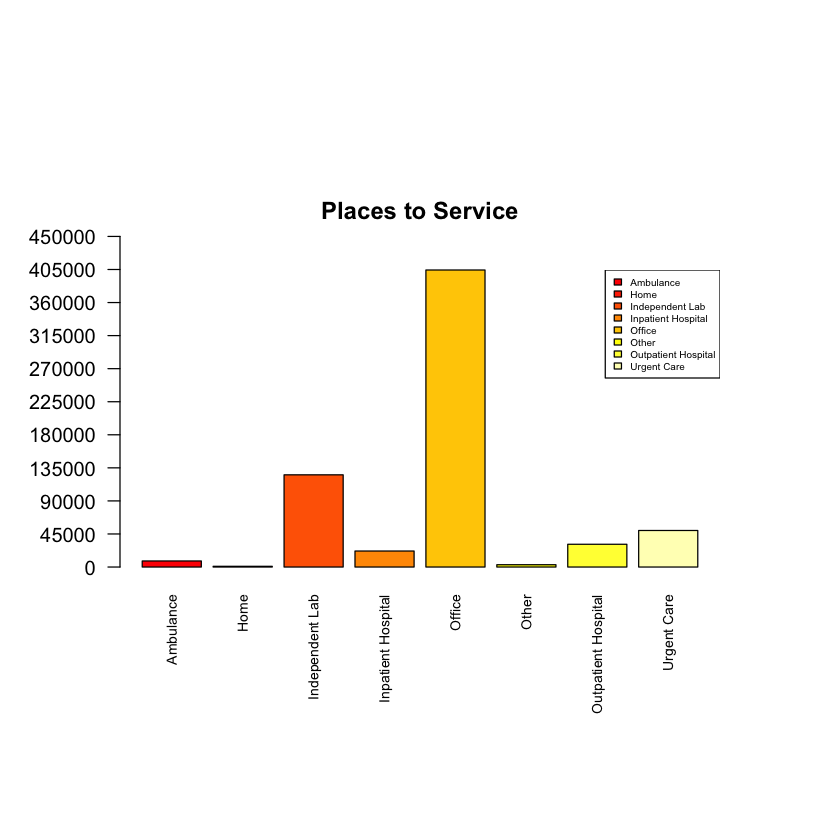

In [37]:
s <- table(claims$specialty)
par(mar=c(0,0,5,0), pin = c(5,2.5), bg = NA)
# dev.new(width = 550, height = 330, unit = "px")
barplot(s, main = "Specialties", yaxp=c(0, 180000, 5),col = topo.colors(length(s)), las = 2, cex.names = 0.5)
legend("topright",names(s), cex = 0.5,fill = topo.colors(length(s)))

p <- table(claims$placesvc)
#par(mar=c(8.5,5.1,4.1,2.1), pin = c(5,2.5))
barplot(p, main = "Places to Service", yaxp=c(0, 450000, 10), col = heat.colors(length(p)), las = 2, cex.names = 0.7)
legend("topright",names(p), cex = 0.5,fill = heat.colors(length(p)))


* **Why I choose them:** Medical resources distribution, include distribution of people and things, plays a vital role in nowdays medical system, which could bring a huge waste or improve the efficiency
* **How I interprete:** For specialties, the top three busiest specialties are from Internal, General Practice and Laboratory; besides, the "leisureliest" three are from Pathology, Rehabilitation and Obstetrics&Gynecology. As for places or we can call it resources, the demand are most from Office and Independent Lab.
* **Why I use this graph:** At first, I want to use pie chart because pie chart can directly show what is the ratio of one category occupied, but it is difficult to tell different color which category is, then I change to bar chart with legend.
* **What I think is useful:** In terms of what data shows, for **hospital**, it can optimize resources distributed to each department and the hiring plan as well; for **medical school**, probably, it also can be a guide for recruiting plan.

<a id="day&disease"></a>
<a href="#top">Back to Top</a>
### What do the "LengthOfStay", "Charlson Index", "Primary Condition Group" and "Place Serve" tell us?

In [11]:
claims$LengthOfStay <- droplevels(claims$LengthOfStay,"")# must run once
claims$LengthOfStay <- factor(claims$LengthOfStay, c("1 day","2 days","3 days","4 days","5 days","6 days","1- 2 weeks","2- 4 weeks","4- 8 weeks","8-12 weeks","12-26 weeks","26+ weeks"))

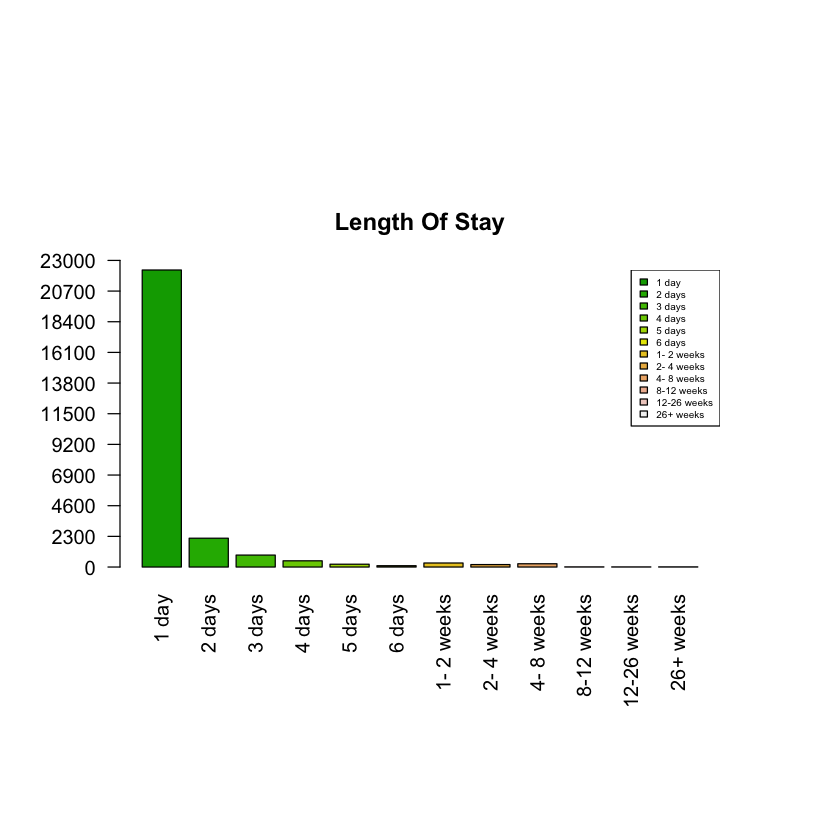

In [12]:
los <- table(claims$LengthOfStay)
par(mar=c(6.5,5.1,4.1,2.1), pin = c(5,2.5))
barplot(los, main = "Length Of Stay", yaxp=c(0, 23000, 10), las = 2, col = terrain.colors(length(los)))
legend("topright",names(los), cex = 0.5,fill = terrain.colors(length(los)))

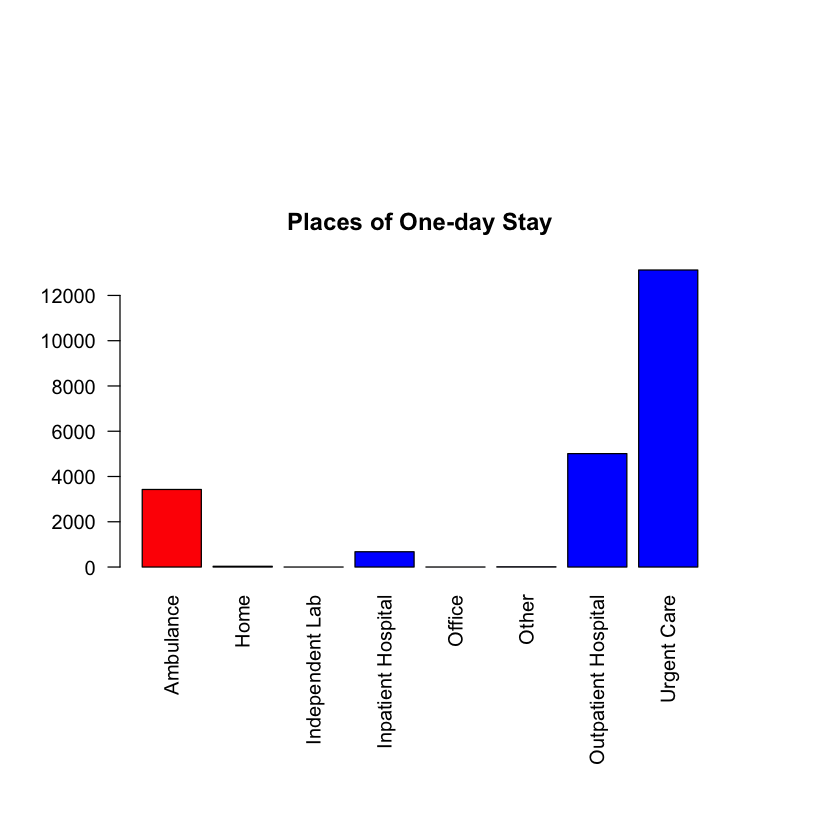

In [27]:
oneday <- subset(claims, claims$LengthOfStay=="1 day")
poneday <- table(oneday$placesvc)
par(mar=c(8.5,5.1,4.1,2.1), pin = c(5,2.5))
barplot(poneday, main = "Places of One-day Stay", las = 2, col = c("red","blue","blue","blue","blue","blue","blue","blue"))

Something I found that a large amount of places are **ambulance**, but it count one day stay, which means it needs to be excepted in future analysis.

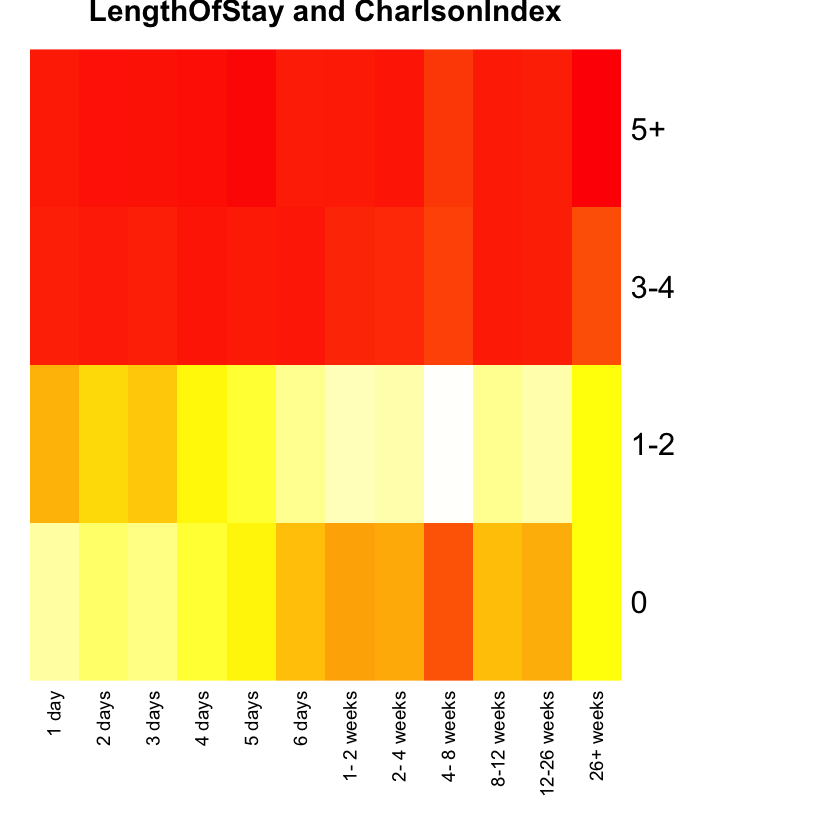

In [152]:
lc <- table(claims$LengthOfStay,claims$CharlsonIndex)
lc <- data.matrix(lc)
lc <- apply(lc, 1, function(x)(x-min(x))/(max(x)-min(x)))
heatmap(main = "LengthOfStay and CharlsonIndex", lc, Rowv=NA, Colv=NA, col = heat.colors(256), scale="column", margins=c(8,10))


In [154]:
x <- seq(pi/4, 5 * pi, length.out = 100)
y <- seq(pi/4, 5 * pi, length.out = 100)
r <- as.vector(sqrt(outer(x^2, y^2, "+")))
grid <- expand.grid(x=x, y=y)
grid$z <- cos(r^2) * exp(-r/(pi^3))
levelplot(z~x*y, grid, cuts = 50, scales=list(log="e"), xlab="",
          ylab="", main="Weird Function", sub="with log scales",
          colorkey = FALSE, region = TRUE)

ERROR: Error in levelplot(z ~ x * y, grid, cuts = 50, scales = list(log = "e"), : could not find function "levelplot"


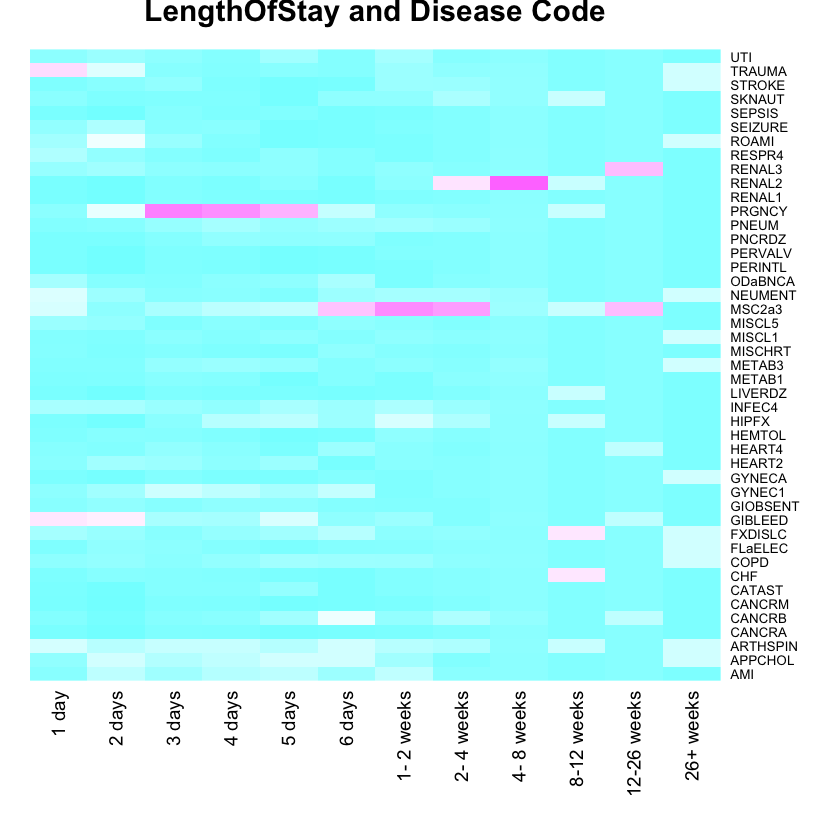

In [153]:
lp <- table(claims$LengthOfStay,claims$PrimaryConditionGroup)
lp <- data.matrix(lp)
lp <- apply(lp, 1, function(x)(x-min(x))/(max(x)-min(x)))
heatmap(main = "LengthOfStay and Disease Code",lp, Rowv=NA, Colv=NA, col = cm.colors(256), scale="column", margins=c(8,5))
            

* **Why I choose them:** For different Primary Condition Groups or CharlsonIndexes, they probably have interesting distribution on Length Of Stay.
* **How I interprete:** 
* **Why I use this graph:** 
* **What I think is useful:** For hospitals, they can distribute resource more efficiently, for example, rooms or equipments of Inpatient Hospital; for doctors, they can make a better therapy plan for patient depending on what disease it is and how serious it is.

<a id="paydelay&disease"></a>
<a href="#top">Back to Top</a>
### What do "PayDelay" and "Primary Condition Group" tell us?

In [5]:
paypcg <- data.frame(claims$paydelay, claims$PrimaryConditionGroup)
names(paypcg)[1] <- "PayDelay"
names(paypcg)[2] <- "PCG"

**About missing data in PayDelay:**

In [6]:
library(plyr)
head(paypcg[is.na(paypcg),])#The last comma is nice
print(paste("NA rows are ",nrow(paypcg[is.na(paypcg),])))
head(paypcg[!is.na(paypcg["PayDelay"])&paypcg["PayDelay"]==0,])
print(paste("Zero rows are ",nrow(paypcg[!is.na(paypcg["PayDelay"])&paypcg["PayDelay"]==0,])))

,PayDelay,PCG
20,NA,METAB3
29,NA,NEUMENT
56,NA,HEART2
57,NA,RENAL3
83,NA,GIBLEED
84,NA,GIBLEED


[1] "NA rows are  44623"


,PayDelay,PCG
3441,0,GIOBSENT
4434,0,ROAMI
11251,0,ROAMI
18824,0,METAB3
20491,0,MSC2a3
23332,0,RENAL3


[1] "Zero rows are  157"


In [7]:
paypcg[is.na(paypcg)] <- 0
#nrow(paypcg[is.na(paypcg),])

Before I analysis this question, I found there are NA values in "PayDelay". Then I guess probably those means no paydelay, but I found that there are few of them have paydelay equals zero. So those NA values are possible that payments are issuing or the due date hasn't come yet, which means I can treat them as zero, because there is no delay on the payment.

Personally, if those 157 claims with zero paydelay are the only claims without paydelay, it doesn't make sence, because the scale of the dataset is 640K+. However, we need to analysis depending on the dataset, because we are not professional to the healthcare data.

**Continue:**

[1] "Summary of Paydelay: "


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   24.00   36.00   43.37   56.00  161.00 

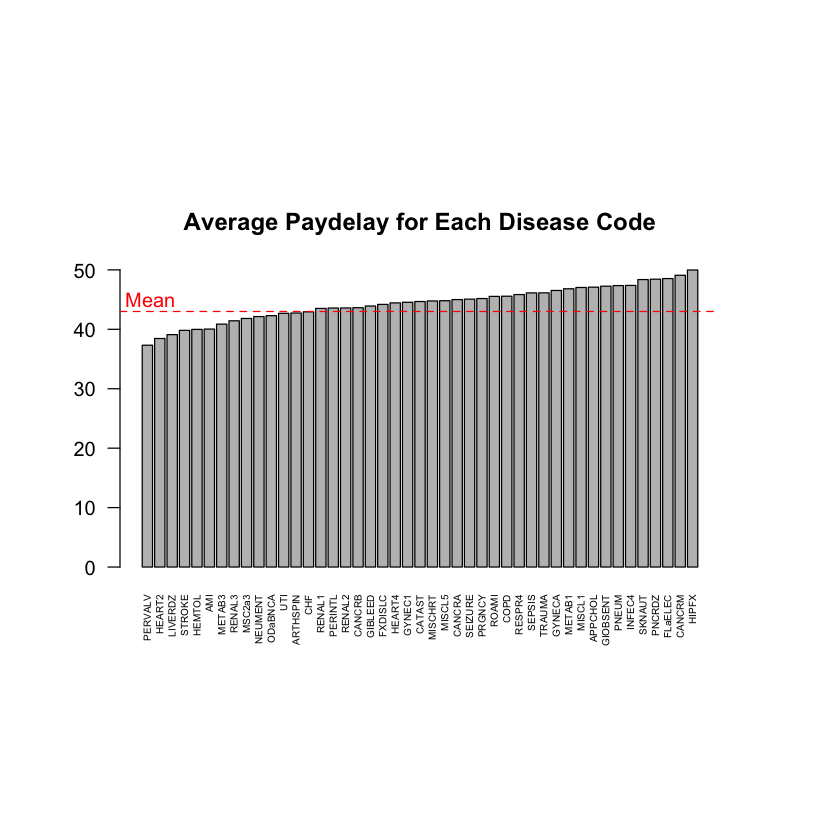

 [1] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1


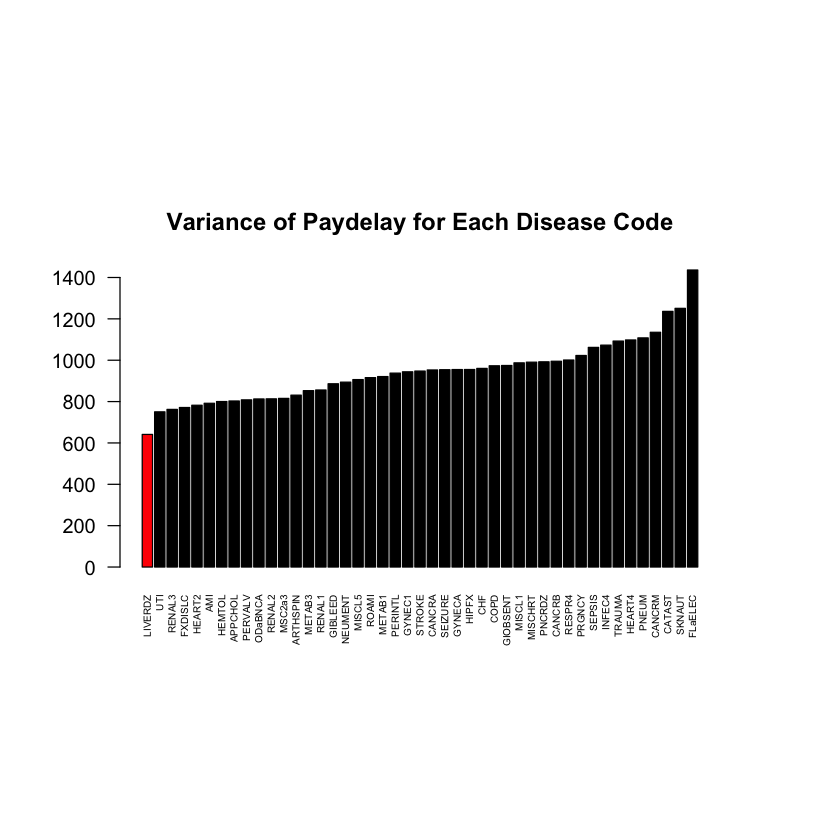

In [14]:
print("Summary of Paydelay: ")
summary(paypcg$PayDelay)

paypcg_mean <- aggregate(paypcg["PayDelay"], paypcg["PCG"], mean)
paypcg_mean <- paypcg_mean[order(paypcg_mean$PayDelay),]
par(pin = c(5,2.5))
barplot(main = "Average Paydelay for Each Disease Code", yaxp=c(0, 50, 5), height = t(as.matrix(paypcg_mean[2])), names.arg = t(as.matrix(paypcg_mean[1])), las = 2, cex.names = 0.5, col = "grey")
abline(h = 43, col = "red", lty = 2)
text(1, 45, "Mean", col = "red") 

paypcg_var <- aggregate(paypcg["PayDelay"], paypcg["PCG"], var)
paypcg_var <- paypcg_var[order(paypcg_var$PayDelay),]
#paypcg_var
cset <- rep(1, length(paypcg_var$PayDelay)-1)
cset <- c(2,cset)
barplot(paypcg_var[[2]],main = "Variance of Paydelay for Each Disease Code",
        names.arg = t(as.matrix(paypcg_var[1])), las = 2, cex.names = 0.5, col = cset)
# matrix to plot stacked barplot
print(cset)
# abline(v = 0.7, col = "red",lty = 2,lwd=8)
# abline(v = 53.5, col = "red",lty = 2,lwd=8)


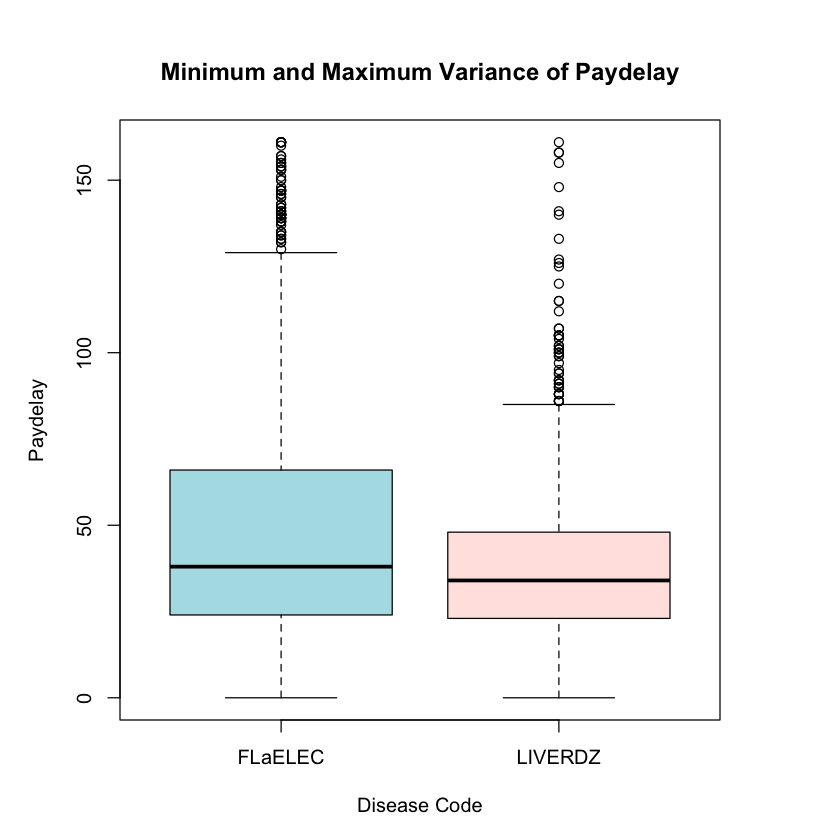

In [35]:
onepcg <- subset(paypcg, paypcg$PCG=="FLaELEC"|paypcg$PCG=="LIVERDZ")
onepcg <- droplevels(onepcg)
#onepcg
par(pin = c(5,5))
boxplot(PayDelay~PCG,data=onepcg, main="Minimum and Maximum Variance of Paydelay", xlab="Disease Code", ylab="Paydelay", col=c('powderblue', 'mistyrose'))

At first, personally guess the average paydelay from each disease suppose not to be almost **uniformly distributed**. Although the varicance varies a lot, the box plot shows this probably caused by **outliers**.

In [ ]:
# common disease based on different fiancial conditions

* **Why I choose them:** The purpose is to find some corelation between primary condition group and paydelay, for example, the patient has cancer probably is easilier delay payments than who gets flu. On the contract, probably we can find the common disease based on different fiancial conditions.
* **How I interprete:** 
* **Why I use this graph:** 
* **What I think is useful:** For insurance companies, it can help us to make an insurance coverage plan for each kind of disease.

<a id="dsfs"></a>
<a href="#top">Back to Top</a>
### What do personal "DaySinceFirstService" and "Primary Condition Group"  tell us?
**Pick a member with most claims as an example.**

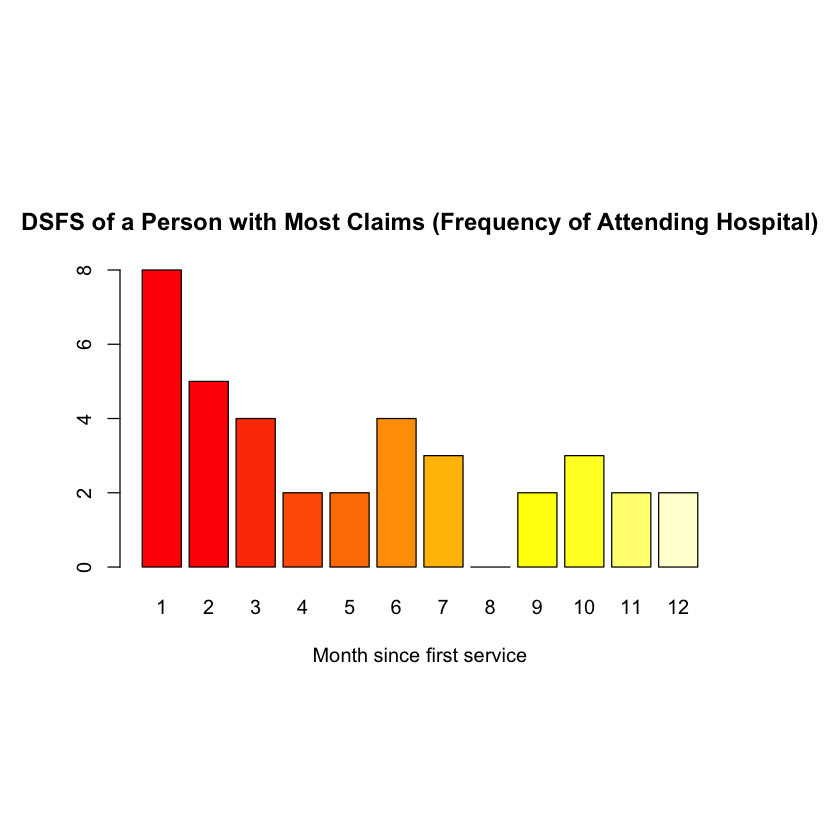

In [38]:
oneall <- subset(claims, MemberID==643099505)
onedsfs <- summary(oneall$dsfs)
# Is here a better way? we can use table(...) here 
names(onedsfs)[1] <- 1
names(onedsfs)[2] <- 2
names(onedsfs)[3] <- 11
names(onedsfs)[4] <- 12
names(onedsfs)[5] <- 3
names(onedsfs)[6] <- 4
names(onedsfs)[7] <- 5
names(onedsfs)[8] <- 6
names(onedsfs)[9] <- 7
names(onedsfs)[10] <- 8
names(onedsfs)[11] <- 9
names(onedsfs)[12] <- 10
onedsfs <- onedsfs[order(as.numeric(names(onedsfs)))]
par(pin = c(5,2.5))
barplot(onedsfs, main = "DSFS of a Person with Most Claims (Frequency of Attending Hospital)", xlab = "Month since first service", col = heat.colors(12))


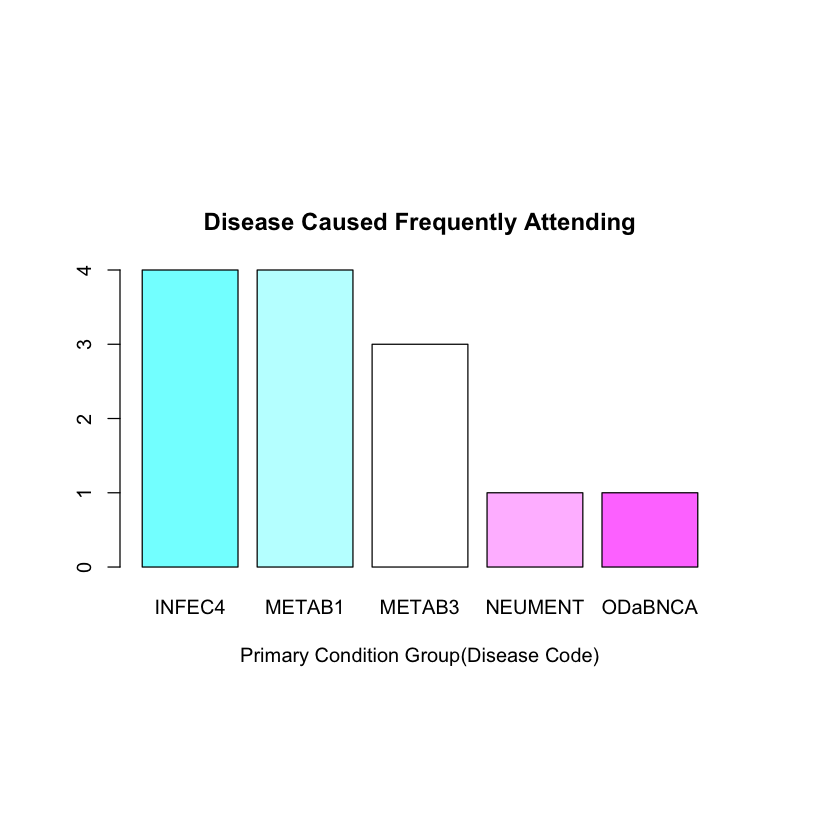

In [40]:
dsfspcg <- summary(oneall$PrimaryConditionGroup[oneall$dsfs=="0- 1 month"|oneall$dsfs=="1- 2 months"])
dsfspcg <- dsfspcg[dsfspcg!=0]
# dsfspcg
par(pin = c(5,2.5))
barplot(dsfspcg,  main = "Disease Caused Frequently Attending", xlab = "Primary Condition Group(Disease Code)", col = cm.colors(length(dsfspcg)))


* **Why I choose them:** The purpose is to find what kind or kinds of disease cause this patient attends hospital frequently.
* **How I interprete:** In the first step, I just manually picked the largest two continuous months which means this patient attends most frequently in these two month. The second step shows what kinds of disease causes most.
* **Why I use this graph:** I was struggling to use stacked(grouped) barplot or two barplots to represent at first, but I decided to use two, because it shows the number of the same disease as well.
* **What I think is useful:** For doctors, if the category of disease in the second graph is mostly same, they can find some **complication** by other main disease, for a simple example, a patient could attend to hospital frequently because of infection caused by surgery. Or they can find some disease which this patient could be easily get, then this can help them find a way to prevent.

<a id="missing3"></a>
<a href="#top">Back to Top</a>
### How should I deal with the missing data: "ProviderID", "Primary Care Physician" and "Vendor"?

#### 1. Missing data in "Vendor":

In [26]:
print(paste("Rows missing:",sum(is.na(claims$vendor))))

[1] "Rows missing: 6492"


**Average PayDelay of missing "Vendor" and not missing "Vendor":**

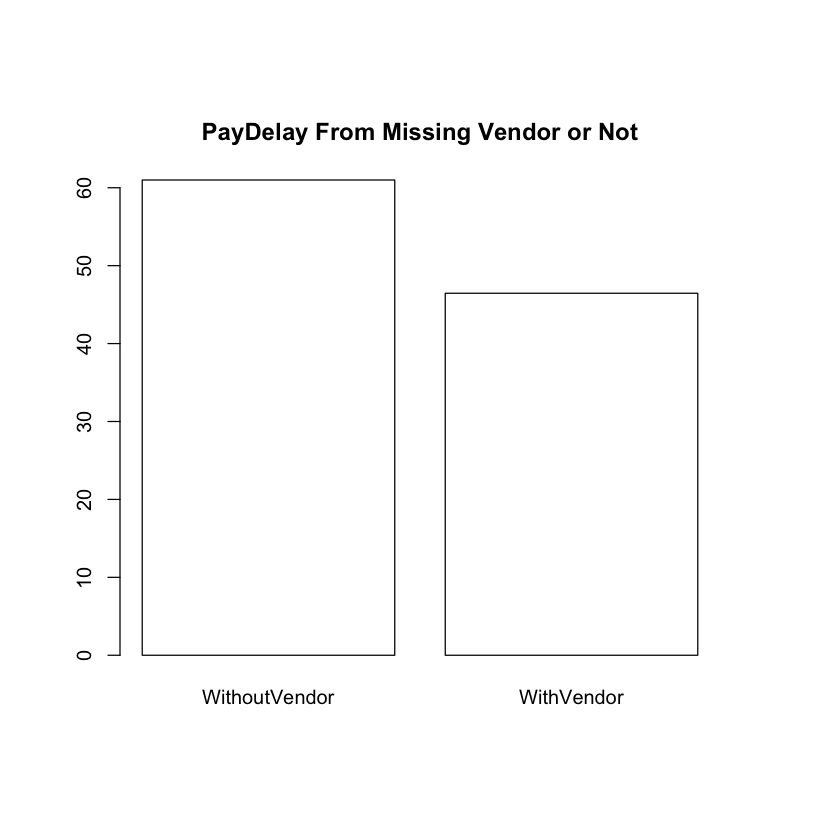

In [42]:
novendor <- subset(claims, is.na(claims$vendor)&!is.na(claims$paydelay))
# novendor
# mean(novendor$paydelay)
withvendor <- subset(claims, !is.na(claims$vendor)&!is.na(claims$paydelay))
# mean(withvendor$paydelay)
payvendor <- c(mean(novendor$paydelay), mean(withvendor$paydelay))
names(payvendor)[1] <- "WithoutVendor"
names(payvendor)[2] <- "WithVendor"
par(pin = c(5,4))
barplot(payvendor, main = "PayDelay From Missing Vendor or Not", col = "white")

From the dataset discription, "vendor" is the one to give bills to patients, for example, hospitals or pharmcy. However, here are missing values, which means **patients will get bills from no where or nobody**; plus, most of patients will make a paydelay for those bills, which means **probably the payment can be not affordable**. 

#### 2. Missing data in "ProviderID" and "Primary Care Physician":

In [40]:
print(paste("Rows missing ProviderID:",sum(is.na(claims$ProviderID))))

[1] "Rows missing ProviderID: 3903"


In [41]:
print(paste("Rows missing PCP:",sum(is.na(claims$pcp))))

[1] "Rows missing PCP: 1619"


For these two attributes, some claims indeed don't have PCP, for example, claims from General Practice, but others probably the PCP is one's provider. So we probably can fill the missing data by each other.

In [42]:
print(paste("Rows missing both:",sum(is.na(claims$pcp)&is.na(claims$ProviderID))))

[1] "Rows missing both: 1555"


However, there are still some rows missing both of them. I decided to ignore them in later's analysis.

* **Why I choose them:** The purpose is to deal with the missing data, which it could tell us something from it's missing.
* **How I interprete:** From the graph, we can compare the average paydelay for each group.
* **Why I use this graph:** Apparently to compare the value.
* **What I think is useful:** 

<a id="Members"></a>
<a href="#top">Back to Top</a>
## Members_Y1.cvs
### Data Scale

Member ID | Sex | AgeAtFirstClaim 
:---: | :---: | :---: 
Norminal | Norminal | Norminal 

### Data Summary

In [ ]:
members$MemberID <- as.factor(members$MemberID)
summary(members)

In [ ]:
* **Why I choose this:** Prepare for the common disease discovery from each gender
* **How I interprete:** Compared it with the worldwide gender distribution, as it shows, female patients are more than male patients

* **Why I use this graph:** Histogram is easy for us to compare distributions of each different categories, and especially for here, we use coloring to show the ratio of subcategories.

* **What I think is useful:** For **ladies and gentlemen**, probably, we can find some common disease within an age and gender group, and that can be an alert for them to prevent which kind of disease.

<a id="gender&age"></a>
<a href="#top">Back to Top</a>
### What do "Gender", "Age" and "Primary Condition Group" tell us?

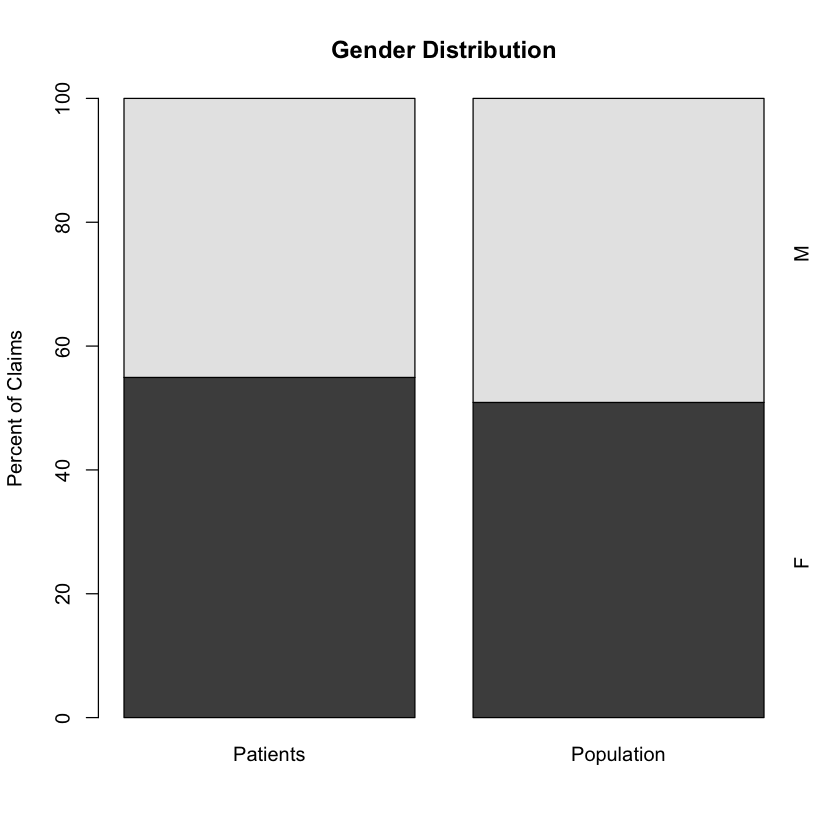

In [9]:
# Reference from "Hospital Data - Some Code to Get You Started With Project 1" - by Michael Hahsler, Wed Aug 29 13:33:07 2018
gender <- table(members$sex)/nrow(members)*100 
barplot(cbind(Patients=gender, Population=c(50.9,49.1)), main = "Gender Distribution", ylab="Percent of Claims", ylim=c(0,100))
mtext(c("F", "M"), side=4, at=c(25,75))

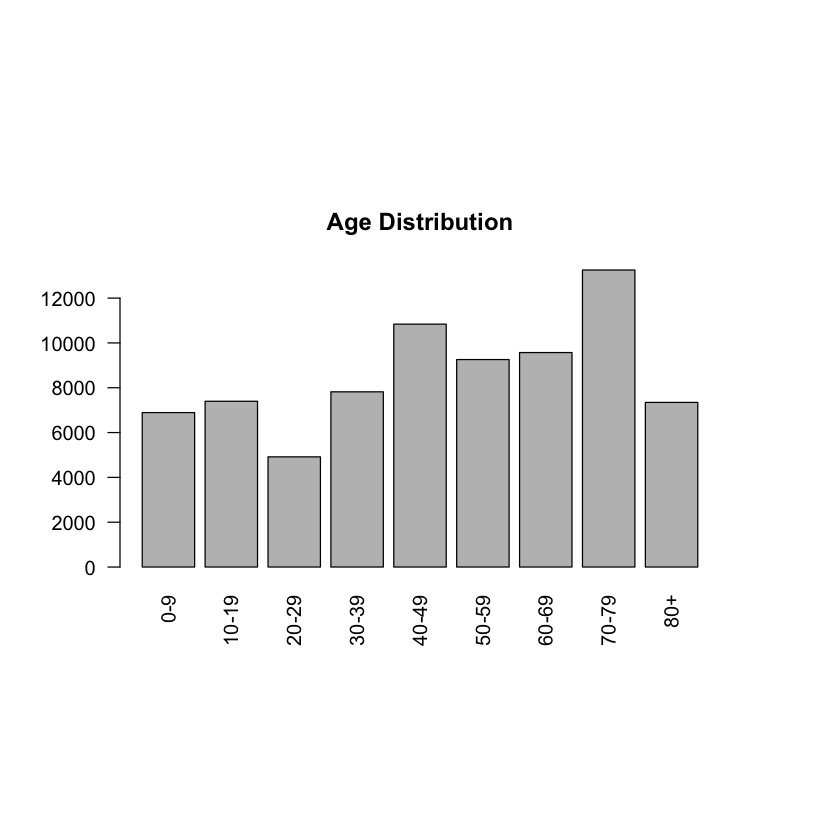

In [44]:
age <- table(members$AgeAtFirstClaim)
par(pin = c(5,2.5))
barplot(age, main = "Age Distribution", las = 2)

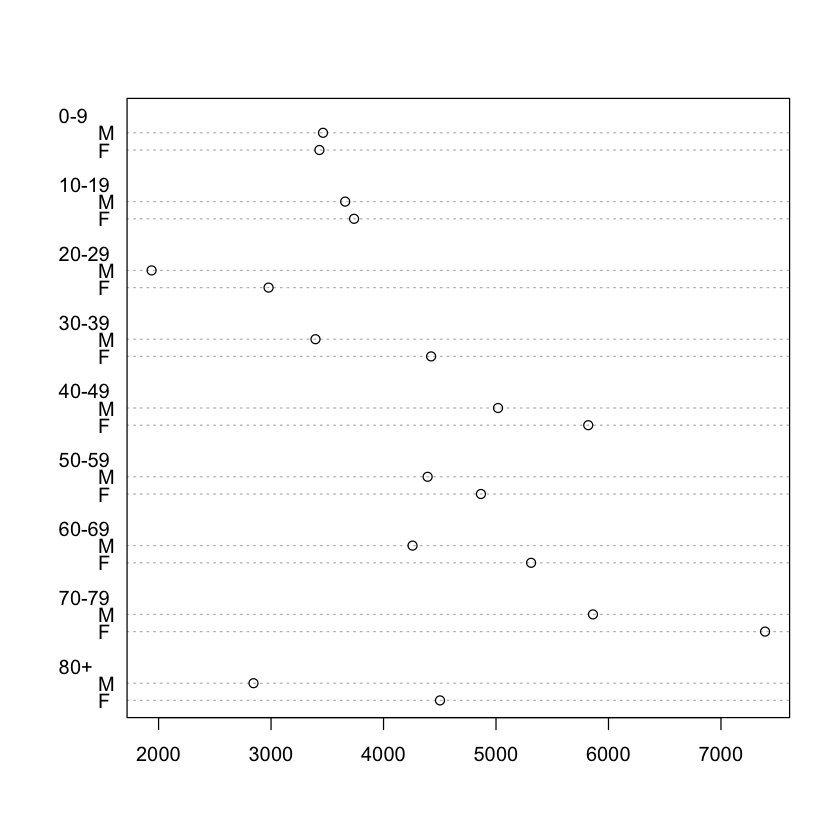

In [7]:
ga <- table(members$sex, members$AgeAtFirstClaim)
dotchart(ga)

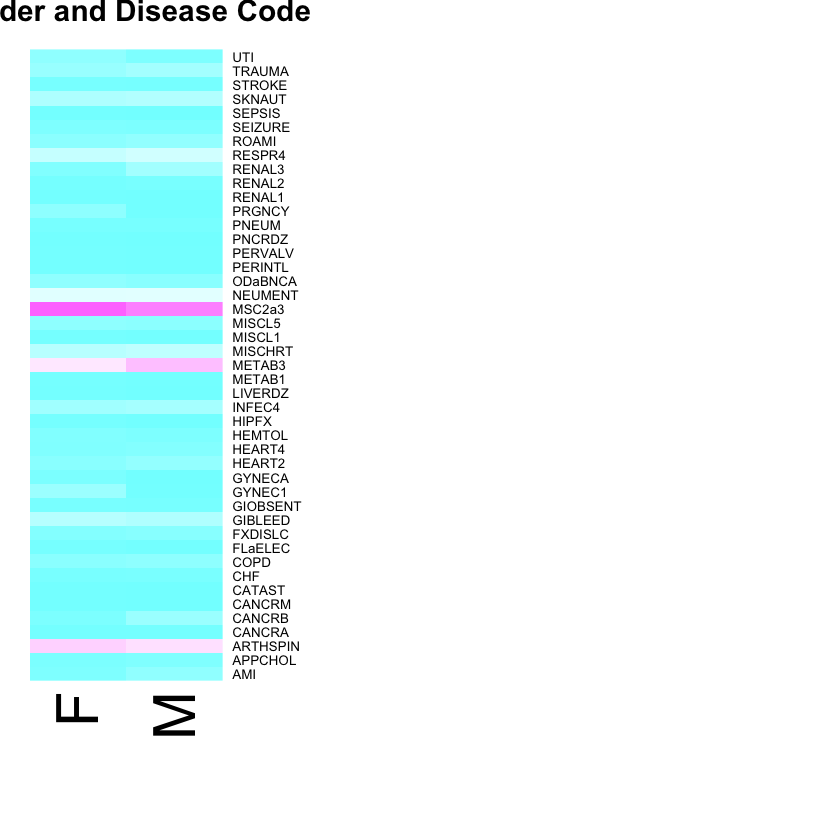

In [178]:
cwm <- merge(claims,members,by = "MemberID")
pcgg <- table(cwm$sex, cwm$PrimaryConditionGroup)
# dotchart(pcgg)
pcgg <- data.matrix(pcgg)
pcgg <- apply(pcgg, 1, function(x)(x-min(x))/(max(x)-min(x)))
heatmap(main = "Gender and Disease Code",pcgg, Rowv=NA, Colv=NA, col = cm.colors(256), scale="column", margins=c(8,30))
            

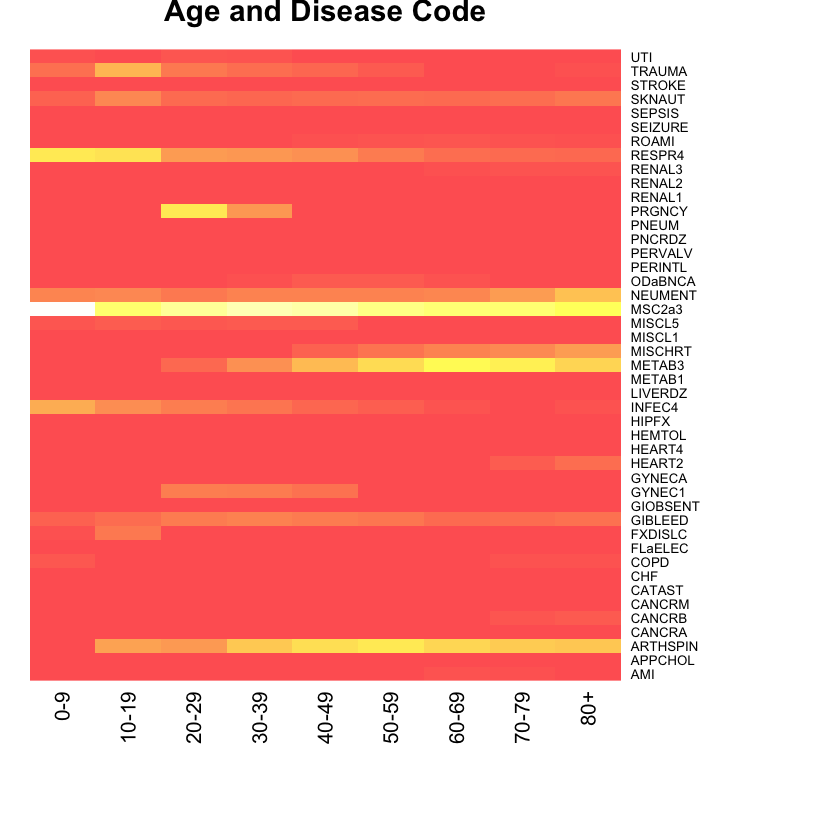

In [98]:
cwm <- merge(claims,members,by = "MemberID")
pcga <- table(cwm$AgeAtFirstClaim, cwm$PrimaryConditionGroup)
#pcga
pcga <- data.matrix(pcga)
pcga <- apply(pcga, 1, function(x)(x-min(x))/(max(x)-min(x)))
heatmap(main = "Age and Disease Code",pcga, Rowv=NA, Colv=NA, col = heat.colors(256, alpha = 0.7), scale="column", margins=c(8,10))
            

* **Why I choose them:** 
* **How I interprete:** 
* **Why I use this graph:** 
* **What I think is useful:**

<a id="Dayin"></a>
<a href="#top">Back to Top</a>
## DayInHospital_Y2.cvs
### Data Scale

Member ID | DaysInHospital
:---: | :---: 
Norminal | Ratio 

### Data Summary

In [ ]:
dayin$memberid <- as.factor(dayin$memberid)
summary(dayin)
# dayin

<a id="dy2"></a>
<a href="#top">Back to Top</a>
### What does "DayInHospital" from Y2 tell us?

* **Why I choose them:** 
* **How I interprete:** 
* **Why I use this graph:** 
* **What I think is useful:**

<a href="#top">Back to Top</a>

# Integration

     
        0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79   80+
  0   23871 24954 23275 37854 53250 47363 48502 71951 38171
  1-2  2862  2843  2351  6804 17952 27114 50035 93847 59716
  3-4     7     0    23    57   306   604  2134  4517  3132
  5+      0     0     3    24    72    65   263   484   300

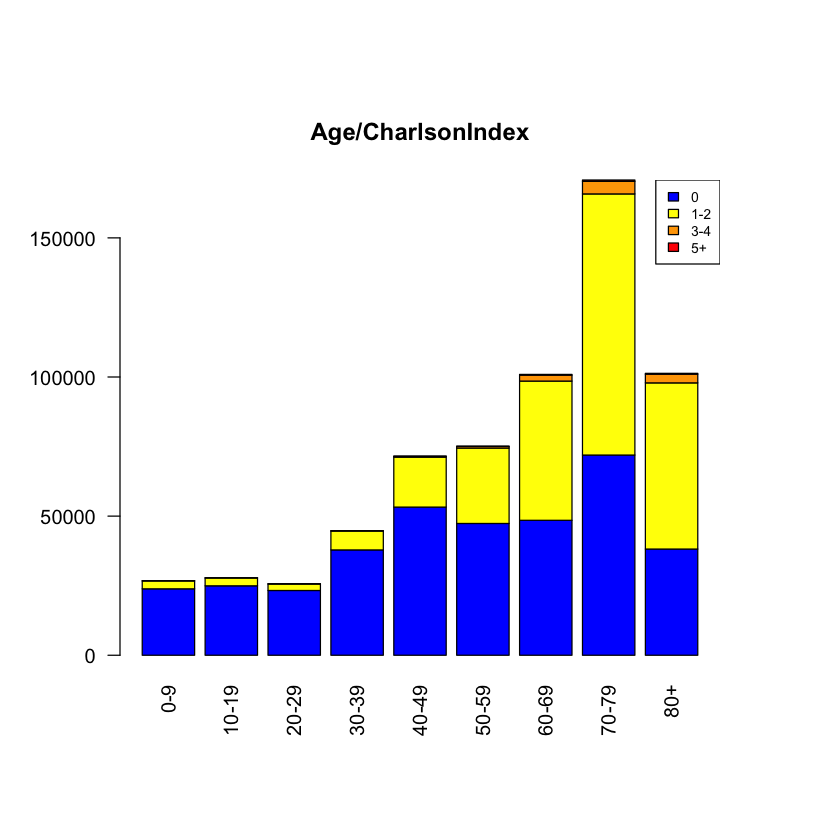

In [63]:
newtab<-merge(members,claims,by="MemberID")
agexcharl<-table(newtab$CharlsonIndex,newtab$AgeAtFirstClaim)
agexcharl
#barplot(agexcharl,col = topo.colors(length()),legend = c("F" ,"M"))
####AGE/CharlsonIndex USEFUL####
par(pin = c(5,4))
barplot(agexcharl,col = c("Blue","yellow","orange","red"),main="Age/CharlsonIndex", las = 2)
legend("topright",c("0","1-2","3-4","5+"), fill= c("Blue","yellow","orange","red"), cex=0.7)


   
      AMI APPCHOL ARTHSPIN CANCRA CANCRB CANCRM CATAST   CHF  COPD FLaELEC
  F  3155    2425    44387    509   2452    169    240  1588  6408     825
  M  5736    2616    27324    592   7287     62    205  1584  5298     422
   
    FXDISLC GIBLEED GIOBSENT GYNEC1 GYNECA HEART2 HEART4 HEMTOL HIPFX INFEC4
  F    4605   17860     1592  10818   2349   6194   3686   3944   780  12163
  M    4077   10986     1239    416     20   6225   3391   2250   243   9378
   
    LIVERDZ METAB1 METAB3 MISCHRT MISCL1 MISCL5 MSC2a3 NEUMENT ODaBNCA PERINTL
  F     392    534  39634   18128    786   7451  70029   27586    7898      98
  M     358    490  32166   13293    515   4864  41470   18719    4418      63
   
    PERVALV PNCRDZ PNEUM PRGNCY RENAL1 RENAL2 RENAL3 RESPR4 ROAMI SEIZURE
  F     393    161  1313   7649     53    760   3916  21384  6806    3084
  M     457     98  1268    184     71   1343   8833  16149  6029    2078
   
    SEPSIS SKNAUT STROKE TRAUMA   UTI
  F     65  15706   1153   

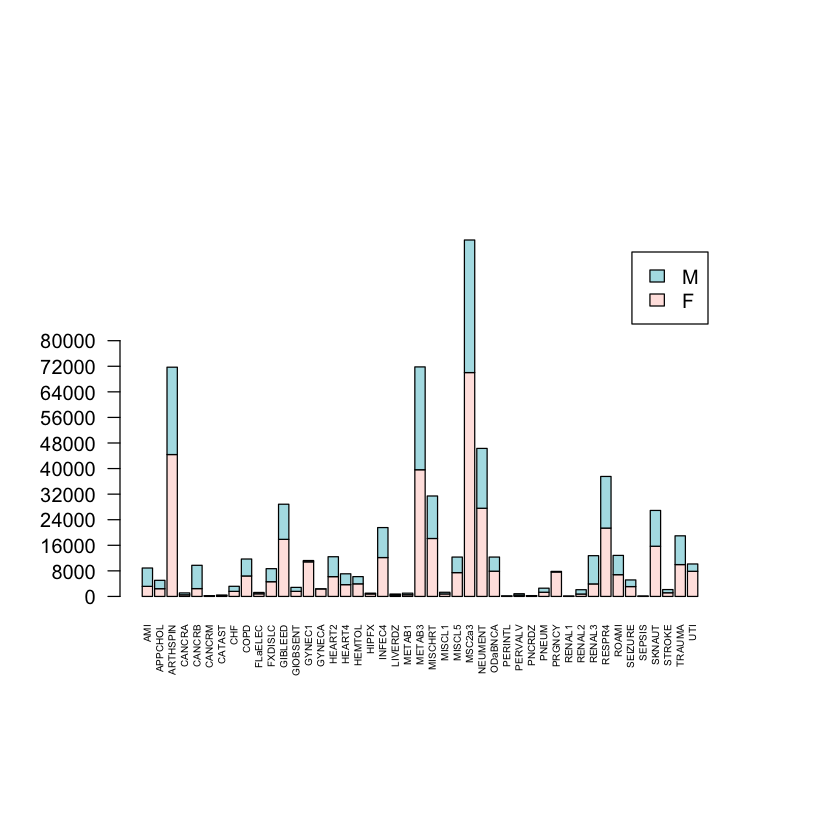

In [73]:

sexXpcp<-table(newtab$sex,newtab$PrimaryConditionGroup)
sexXpcp

################IMPORTANT##################
par(pin = c(5,3))
barplot(sexXpcp, yaxp=c(0, 80000, 10),las=2,legend=c("F","M"), cex.names = 0.5,col = c('mistyrose','powderblue'))

   
         0    1-2    3-4     5+
  F 228559 144724   5072    608
  M 140632 118800   5708    603


	Pearson's Chi-squared test

data:  charxsex
X-squared = 3761.5, df = 3, p-value < 2.2e-16


Number of cases in table: 644706 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 3761, df = 3, p-value = 0

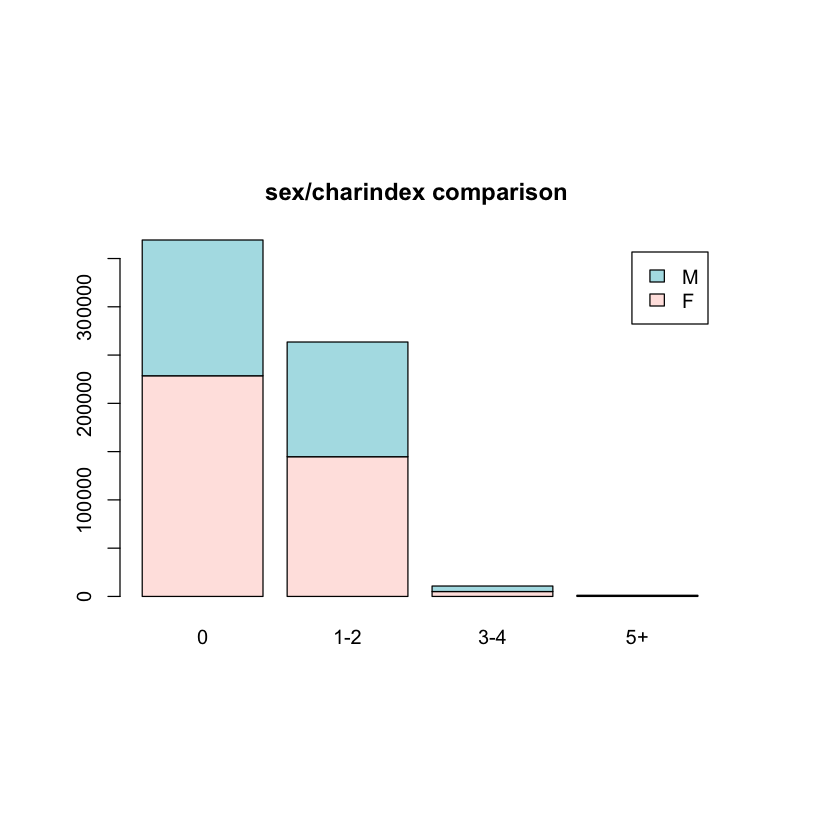

In [76]:
charxsex<-table(newtab$sex,newtab$CharlsonIndex)
charxsex


#WEATHER PATIENT'S SEX IS INDEPENDENT OF CHARLSON INDEX
chisq.test(charxsex) 
summary(charxsex)

##USEFUL add colors!######
par(pin = c(5,3))
barplot(charxsex,legend=c("F","M"),main="sex/charindex comparison ",col = c('mistyrose','powderblue'))

Number of cases in table: 77289 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 356.4, df = 8, p-value = 3.978e-72

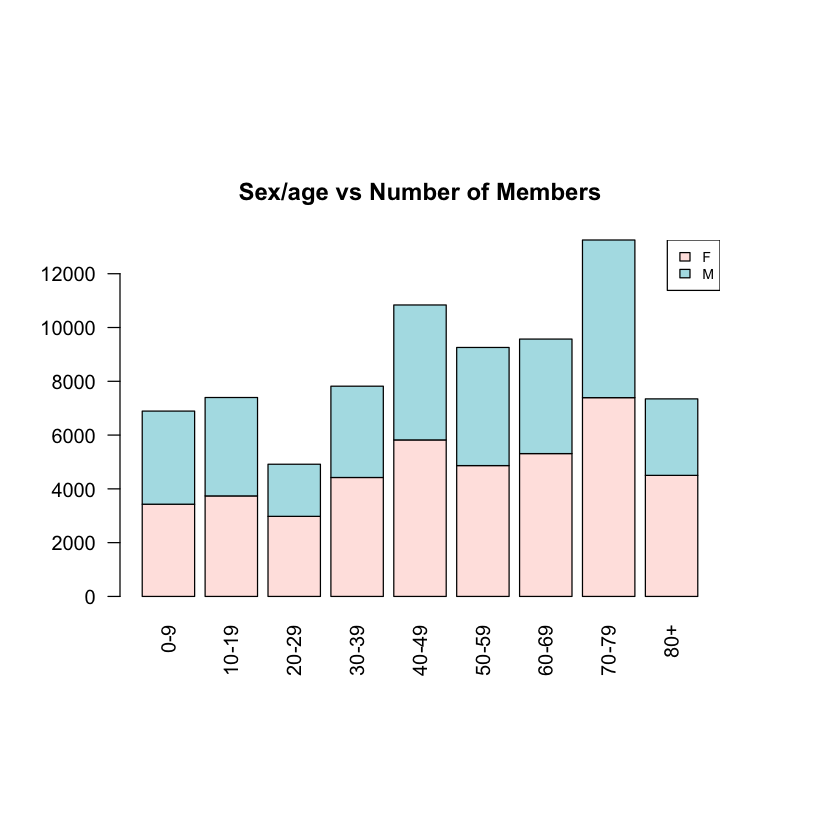

In [82]:
sexXage<-table(members$sex,members$AgeAtFirstClaim)
summary(sexXage)

#########IMPORTANT USEFUL
par(pin = c(5,3))
barplot(sexXage,main="Sex/age vs Number of Members", ,col = c('mistyrose','powderblue'), las = 2)
legend("topright",c("F" ,"M"), fill = c('mistyrose','powderblue'), cex = 0.7)